<a href="https://colab.research.google.com/github/BrianGisemba/Autolib-/blob/main/Moringa_Wk4_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING OUR LIBRARIES**

In [38]:
# Importing the Pandas Library
import pandas as pd

# Importing the Numpy Library
import numpy as np

**READING THE DATASET FROM OUR CSV FILE**

In [39]:
#loading our data
url="http://bit.ly/autolib_dataset"
df=pd.read_csv(url)
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


**PREVIEWING OUR DATASET**

In [40]:
#lets preview the firs 10 rows
df.head(10)


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


**ACCESING INFORMATION ABOUT OUR DATASET**

In [41]:
# Getting to know more about the dataset by accessing its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

**CLEANING OUR DATASET**

**VALIDITY**

In [42]:
# Dropping irrelevant columns
#A list of irrelevant colums to be dropped 
drop=['Address', 'Cars', 'Displayed comment', 'ID', 'Geo point', 
      'Charge Slots','Charging Status', 'Rental status', 'Scheduled at', 'Slots', 
       'Subscription status', 'year', 'month', 'day', 'minute']
df.drop(drop,axis=1,inplace=True)
df

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Station type,Status,hour
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,station,ok,11
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,station,ok,7
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,station,ok,20
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,station,ok,4
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,station,ok,17
...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,Colombes,STATION,92700,Colombes/MÃ©nelotte/8,station,ok,11
4996,4,0,0,Paris,STATION,75015,Paris/Dantzig/37,station,ok,16
4997,1,0,0,Paris,STATION,75007,Paris/Bac/142,station,ok,7
4998,2,0,0,Fontenay-Sous-Bois,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,station,ok,17


In [43]:
#checking for whitespaces and removing them from columns

columns = ['City', 'Kind', 'Public name','Station type','Status']

for column in columns:
    df[column] = df[column].str.strip()
df.head()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Station type,Status,hour
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,station,ok,11
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,station,ok,7
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,station,ok,20
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,station,ok,4
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,station,ok,17


**COMPLETNESS**

In [44]:
# Checking for missing values
df.isnull().sum()
#no missing values

Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
City                  0
Kind                  0
Postal code           0
Public name           0
Station type          0
Status                0
hour                  0
dtype: int64

**CONSISTENCY**

In [45]:
#Checking for duplicates
df.duplicated()
#dropping duplicates if available
df.drop_duplicates()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Station type,Status,hour
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,station,ok,11
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,station,ok,7
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,station,ok,20
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,station,ok,4
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,station,ok,17
...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,Colombes,STATION,92700,Colombes/MÃ©nelotte/8,station,ok,11
4996,4,0,0,Paris,STATION,75015,Paris/Dantzig/37,station,ok,16
4997,1,0,0,Paris,STATION,75007,Paris/Bac/142,station,ok,7
4998,2,0,0,Fontenay-Sous-Bois,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,station,ok,17


**UNIFORMITY**

In [46]:
#Standardization - Fixing messy column names
#lowering the colums
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df
df.head(5)

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,kind,postal_code,public_name,station_type,status,hour
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,station,ok,11
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,station,ok,7
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,station,ok,20
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,station,ok,4
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,station,ok,17


**DETERMINING OUTLIERS**

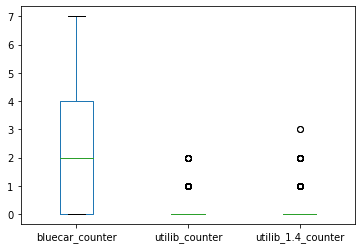

In [47]:
#checking for presence of outliers
df.boxplot(column =['bluecar_counter','utilib_counter','utilib_1.4_counter'], grid = False) 

In [48]:
#removing the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df)
print(outliers_out)

      bluecar_counter  utilib_counter  ...  status hour
0                   0               0  ...      ok   11
1                   6               0  ...      ok    7
2                   3               0  ...      ok   20
3                   3               1  ...      ok    4
4                   3               0  ...      ok   17
...               ...             ...  ...     ...  ...
4995                2               0  ...      ok   11
4996                4               0  ...      ok   16
4997                1               0  ...      ok    7
4998                2               0  ...      ok   17
4999                4               0  ...      ok   10

[5000 rows x 10 columns]
      bluecar_counter  utilib_counter  ...  status hour
0                   0               0  ...      ok   11
1                   6               0  ...      ok    7
4                   3               0  ...      ok   17
5                   0               0  ...      ok    7
6                   0 

**EXPORTING THE CLEANED DATASET**

In [49]:
 #Let's export our dataframe into a csv file
 df.to_csv('bluecars.csv')
 df

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,kind,postal_code,public_name,station_type,status,hour
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,station,ok,11
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,station,ok,7
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,station,ok,20
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,station,ok,4
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,station,ok,17
...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,Colombes,STATION,92700,Colombes/MÃ©nelotte/8,station,ok,11
4996,4,0,0,Paris,STATION,75015,Paris/Dantzig/37,station,ok,16
4997,1,0,0,Paris,STATION,75007,Paris/Bac/142,station,ok,7
4998,2,0,0,Fontenay-Sous-Bois,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,station,ok,17


**Answering Questions**

In [50]:
#Identify the most popular hour of the day for picking up a shared electric car (Bluecar) 
#in the city of Paris over the month of April 2018.

df[(df.city == 'Paris')&(df.bluecar_counter==0)].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

hour
2    54
Name: hour, dtype: int64

In [51]:
#What is the most popular hour for returning cars?
df[df.bluecar_counter ==7].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

hour
13    6
4     5
0     4
5     2
17    2
Name: hour, dtype: int64

In [52]:
#What station is the most popular?
df['public_name'].value_counts().head(1)

Paris/Porte de Montrouge/8    13
Name: public_name, dtype: int64

In [53]:
#What station is the most popular?
#At the most popular picking hour
df[df['hour']==2].groupby('public_name')['public_name'].count().sort_values(ascending = False).head(1)

public_name
Courbevoie/Paix/2    3
Name: public_name, dtype: int64

In [54]:
#What postal code is the most popular for picking up Blue cars

df[(df.bluecar_counter==0)].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

postal_code
75008    94
Name: postal_code, dtype: int64

In [55]:
#Does the most popular station belong to that postal code?
df[(df['public_name']=='Courbevoie/Paix/2' )&(df['postal_code']==75008)]

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,kind,postal_code,public_name,station_type,status,hour


In [56]:
# What postal code is the most popular for picking up Blue cars
# At the most popular picking hour?
df[(df.bluecar_counter==0)&(df.hour==2)].groupby('postal_code')['postal_code'].count().sort_values(ascending = False).head(1)

postal_code
75006    7
Name: postal_code, dtype: int64